In [2]:
#Things to Revisit:

## Bar Chart with precipitation data - formatting - xaxis labels overlapping
## Summary Statistics for precipitation - what type of stats do they want?

In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt
from pprint import pprint

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///Unit_10_HW_Resources_hawaii.sqlite")

In [8]:
# reflect an existing database into a new model (object)
## Declare a Base using `automap_base()`
Base = automap_base()
# reflect the tables
## Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view (print) all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query (in SQLAlchemy) to retrieve the last 12 months of precipitation data and plot the results
## Calculate the date 1 year ago from the last data point in the database
last_day = dt.date(2017, 8, 23)
one_year_ago = last_day - dt.timedelta(days=365)
print(one_year_ago)

## Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).order_by(Measurement.date.desc()).all()
pprint(results)

2016-08-23
[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.

 ('2016-12-28', 0.01),
 ('2016-12-28', None),
 ('2016-12-28', 0.06),
 ('2016-12-28', 0.09),
 ('2016-12-28', 0.14),
 ('2016-12-27', 0.0),
 ('2016-12-27', 0.03),
 ('2016-12-27', 0.02),
 ('2016-12-27', 0.0),
 ('2016-12-27', 0.05),
 ('2016-12-27', 0.14),
 ('2016-12-26', 0.02),
 ('2016-12-26', 0.26),
 ('2016-12-26', None),
 ('2016-12-26', 0.06),
 ('2016-12-26', 0.22),
 ('2016-12-26', 1.48),
 ('2016-12-25', 0.0),
 ('2016-12-25', 0.03),
 ('2016-12-25', 0.0),
 ('2016-12-25', 0.02),
 ('2016-12-25', 0.38),
 ('2016-12-24', 0.01),
 ('2016-12-24', 0.14),
 ('2016-12-24', 0.13),
 ('2016-12-24', 0.06),
 ('2016-12-24', 0.2),
 ('2016-12-24', 1.08),
 ('2016-12-23', 0.01),
 ('2016-12-23', 0.1),
 ('2016-12-23', 0.03),
 ('2016-12-23', None),
 ('2016-12-23', 0.02),
 ('2016-12-23', 0.24),
 ('2016-12-23', 0.83),
 ('2016-12-22', 0.01),
 ('2016-12-22', 0.17),
 ('2016-12-22', 0.05),
 ('2016-12-22', None),
 ('2016-12-22', 0.14),
 ('2016-12-22', 0.86),
 ('2016-12-22', 1.24),
 ('2016-12-21', 0.0),
 ('2016-12-21', 0.

In [31]:
## Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(['date'], inplace=True)
# print(df.shape)
df.head(5)

## Sort the dataframe by date
### Already sorted by date in the query (before putting into df) using the order_by function

,precipitation
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


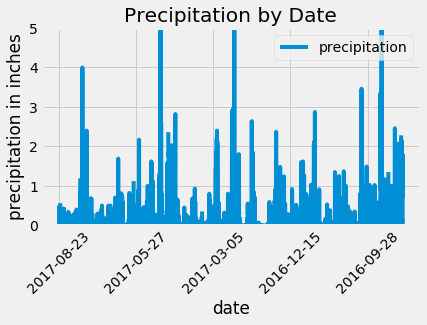

In [33]:
## Use Pandas Plotting with Matplotlib to plot the data
df.plot(title="Precipitation by Date")
plt.ylim(0, 5)
plt.tight_layout()
plt.xlabel('date')
plt.ylabel('precipitation in inches')
plt.xticks(rotation=45)
plt.show()

In [74]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [37]:
# Design a query to show how many stations are available in this dataset?
station_results = session.query(Measurement).group_by(Measurement.station).count()
# station_results_2 = session.query(func.count(Station.station)).all()
# pprint(station_results_2[0][0])
pprint(station_results)

9


In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations= session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
pprint(active_stations)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]


In [56]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()
print("Lowest Temp Recorded:", most_active[0][0])
print("Average Temp:", most_active[0][1])
print("Highest Temp Recorded:", most_active[0][2])

Lowest Temp Recorded: 54.0
Average Temp: 71.66378066378067
Highest Temp Recorded: 85.0


In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= one_year_ago).\
    filter(Measurement.station == 'USC00519281').all()
pprint(tobs_results)

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [83]:
## Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(tobs_results, columns=['date', 'tobs'])
df.set_index(['date'], inplace=True)
# print(df.shape)
df.head(5)

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


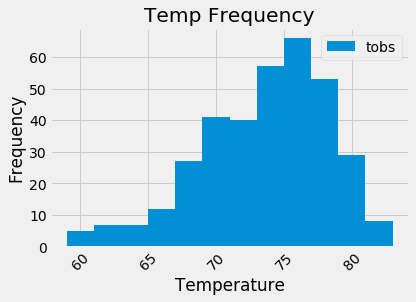

In [86]:
df.plot.hist(title="Temp Frequency", bins=12)
plt.tight_layout()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
